In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('secE.csv')


In [3]:

rename = {
    "seaq01": "work_last_month",
    "seaq02": "days_worked_last_month",
    "seaq03": "job_or_business",
    "seaq04": "main_occupation",
    "seaq05": "enterprise_work_type",
    "seaq06": "employment_status",
    "seaq07": "report_income",
    "seaq08": "monthly_income",
    "seaq09": "months_worked_last_year",
    "seaq10": "annual_income",
    "seaq11": "other_work_last_year",
    "seaq12": "other_occupation",
    "seaq13": "other_enterprise_work_type",
    "seaq14": "other_employment_status",
    "seaq15": "total_income_last_year",
    "seaq16": "other_work_done_last_year",
    "seaq17": "other_income_last_year",
    "seaq18": "wages_in_kind",
    "seaq19": "wages_in_kind_sold",
    "seaq20": "pension_received",
    "seaq21": "pension_income",
    "seaq22": "income_used_for_hh",
    "seaq23": "income_inside_pakistan",
    "seaq24": "foreign_remittances",
    "seaq25": "rent_income",
    "seaq26": "other_income"
}


df1.rename(columns=rename, inplace=True)
print(df1.columns)


Index(['Unnamed: 0', 'hhcode', 'psu', 'Province', 'Region', 'district', 'idc',
       'work_last_month', 'days_worked_last_month', 'job_or_business',
       'main_occupation', 'enterprise_work_type', 'employment_status',
       'report_income', 'monthly_income', 'months_worked_last_year',
       'annual_income', 'other_work_last_year', 'other_occupation',
       'other_enterprise_work_type', 'other_employment_status',
       'total_income_last_year', 'other_work_done_last_year',
       'other_income_last_year', 'wages_in_kind', 'wages_in_kind_sold',
       'pension_received', 'pension_income', 'income_used_for_hh',
       'income_inside_pakistan', 'foreign_remittances', 'rent_income',
       'other_income'],
      dtype='object')


In [4]:
df1.head()

,Unnamed: 0,hhcode,psu,Province,Region,district,idc,work_last_month,days_worked_last_month,job_or_business,...,other_income_last_year,wages_in_kind,wages_in_kind_sold,pension_received,pension_income,income_used_for_hh,income_inside_pakistan,foreign_remittances,rent_income,other_income
0,0,101100101.0,1011001.0,Khyber Pakhtunkhwa,rural,Abbottabad,1.0,yes,20.0,NaN,...,NaN,no,NaN,no,NaN,yes,0.0,0.0,0.0,0.0
1,1,101100101.0,1011001.0,Khyber Pakhtunkhwa,rural,Abbottabad,2.0,yes,30.0,NaN,...,NaN,no,NaN,no,NaN,no income reported,0.0,0.0,0.0,0.0
2,2,101100101.0,1011001.0,Khyber Pakhtunkhwa,rural,Abbottabad,3.0,no,NaN,no not seeking work,...,NaN,no,NaN,no,NaN,no income reported,0.0,0.0,0.0,0.0
3,3,101100101.0,1011001.0,Khyber Pakhtunkhwa,rural,Abbottabad,4.0,no,NaN,no not seeking work,...,NaN,no,NaN,no,NaN,no income reported,0.0,0.0,0.0,0.0
4,4,101100101.0,1011001.0,Khyber Pakhtunkhwa,rural,Abbottabad,5.0,no,NaN,no not seeking work,...,NaN,no,NaN,no,NaN,no income reported,0.0,0.0,0.0,0.0


In [5]:
categorical_cols = df1.select_dtypes(include=['object']).columns
continuous_cols = df1.select_dtypes(include=['float64', 'int64']).columns
df1[categorical_cols] = df1[categorical_cols].fillna("not defined")
df1[continuous_cols] = df1[continuous_cols].fillna(0)
print(f"Total Rows: {len(df1)}")
print(f"Categorical Columns: {len(categorical_cols)}")
print(f"Continuous Columns: {len(continuous_cols)}")
print(f"Null Values After Processing: {df1.isnull().sum().sum()}")
print("Sample Data:")
print(df1.head())


Total Rows: 633770
Categorical Columns: 16
Continuous Columns: 17
Null Values After Processing: 0
Sample Data:
   Unnamed: 0       hhcode        psu            Province Region    district  \
0           0  101100101.0  1011001.0  Khyber Pakhtunkhwa  rural  Abbottabad   
1           1  101100101.0  1011001.0  Khyber Pakhtunkhwa  rural  Abbottabad   
2           2  101100101.0  1011001.0  Khyber Pakhtunkhwa  rural  Abbottabad   
3           3  101100101.0  1011001.0  Khyber Pakhtunkhwa  rural  Abbottabad   
4           4  101100101.0  1011001.0  Khyber Pakhtunkhwa  rural  Abbottabad   

   idc work_last_month  days_worked_last_month      job_or_business  ...  \
0  1.0             yes                    20.0          not defined  ...   
1  2.0             yes                    30.0          not defined  ...   
2  3.0              no                     0.0  no not seeking work  ...   
3  4.0              no                     0.0  no not seeking work  ...   
4  5.0              no      

In [6]:
df1['hhcode'].head()

0    101100101.0
1    101100101.0
2    101100101.0
3    101100101.0
4    101100101.0
Name: hhcode, dtype: float64

In [7]:
df1['monthtoannual'] = df1['monthly_income'] * 12 

In [8]:

income = [
    'pension_income', 'income_inside_pakistan', 
    'foreign_remittances', 'rent_income', 'other_income','annual_income','monthtoannual'
]


df1[income] = df1[income].apply(pd.to_numeric, errors='coerce', axis=1)
df1['total_income'] = df1[income].sum(axis=1)


In [9]:

df1['daily_income'] = df1['total_income'] / 365

daily_income_mean = df1.groupby('hhcode')['daily_income'].mean().reset_index()

df1 = pd.merge(df1, daily_income_mean, on='hhcode', suffixes=('', '_mean'))



In [10]:
df1.head(15)

,Unnamed: 0,hhcode,psu,Province,Region,district,idc,work_last_month,days_worked_last_month,job_or_business,...,pension_income,income_used_for_hh,income_inside_pakistan,foreign_remittances,rent_income,other_income,monthtoannual,total_income,daily_income,daily_income_mean
0,0,101100101.0,1011001.0,Khyber Pakhtunkhwa,rural,Abbottabad,1.0,yes,20.0,not defined,...,0.0,yes,0.0,0.0,0.0,0.0,0.0,250000.0,684.931507,114.155251
1,1,101100101.0,1011001.0,Khyber Pakhtunkhwa,rural,Abbottabad,2.0,yes,30.0,not defined,...,0.0,no income reported,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,114.155251
2,2,101100101.0,1011001.0,Khyber Pakhtunkhwa,rural,Abbottabad,3.0,no,0.0,no not seeking work,...,0.0,no income reported,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,114.155251
3,3,101100101.0,1011001.0,Khyber Pakhtunkhwa,rural,Abbottabad,4.0,no,0.0,no not seeking work,...,0.0,no income reported,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,114.155251
4,4,101100101.0,1011001.0,Khyber Pakhtunkhwa,rural,Abbottabad,5.0,no,0.0,no not seeking work,...,0.0,no income reported,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,114.155251
5,5,101100101.0,1011001.0,Khyber Pakhtunkhwa,rural,Abbottabad,6.0,no,0.0,no not seeking work,...,0.0,no income reported,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,114.155251
6,6,101100102.0,1011001.0,Khyber Pakhtunkhwa,rural,Abbottabad,1.0,yes,28.0,not defined,...,150000.0,yes,450000.0,0.0,0.0,0.0,2880000.0,3480000.0,9534.246575,1589.041096
7,7,101100102.0,1011001.0,Khyber Pakhtunkhwa,rural,Abbottabad,2.0,no,0.0,no not seeking work,...,0.0,no income reported,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1589.041096
8,8,101100102.0,1011001.0,Khyber Pakhtunkhwa,rural,Abbottabad,3.0,no,0.0,no not seeking work,...,0.0,no income reported,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1589.041096
9,9,101100102.0,1011001.0,Khyber Pakhtunkhwa,rural,Abbottabad,4.0,no,0.0,no not seeking work,...,0.0,no income reported,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1589.041096


In [11]:

average_income = df1.groupby('hhcode')['total_income'].mean().reset_index()

df1 = pd.merge(df1, average_income, on='hhcode', suffixes=('', '_average'))




In [12]:
df1.tail()

,Unnamed: 0,hhcode,psu,Province,Region,district,idc,work_last_month,days_worked_last_month,job_or_business,...,income_used_for_hh,income_inside_pakistan,foreign_remittances,rent_income,other_income,monthtoannual,total_income,daily_income,daily_income_mean,total_income_average
633765,633765,433200126.0,4332001.0,Balochistan,urban,Ziarat,3.0,no,0.0,no not seeking work,...,no income reported,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,438.356164,160000.0
633766,633766,433200127.0,4332001.0,Balochistan,urban,Ziarat,1.0,yes,30.0,not defined,...,yes,0.0,0.0,0.0,0.0,960000.0,960000.0,2630.136986,1068.493151,390000.0
633767,633767,433200127.0,4332001.0,Balochistan,urban,Ziarat,2.0,yes,30.0,not defined,...,yes,0.0,0.0,0.0,0.0,600000.0,600000.0,1643.835616,1068.493151,390000.0
633768,633768,433200127.0,4332001.0,Balochistan,urban,Ziarat,3.0,no,0.0,no not seeking work,...,no income reported,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1068.493151,390000.0
633769,633769,433200127.0,4332001.0,Balochistan,urban,Ziarat,4.0,no,0.0,no not seeking work,...,no income reported,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1068.493151,390000.0


In [13]:
# Define the poverty line based on World Bank criteria (2.15 * 279)
poverty_line = 2.15 * 279
df1['poverty_status'] = df1['daily_income_mean'].apply(lambda x: 'Below Poverty' if x < poverty_line else 'Above Poverty')
print(df1[['hhcode', 'daily_income_mean', 'poverty_status']])


             hhcode  daily_income_mean poverty_status
0       101100101.0         114.155251  Below Poverty
1       101100101.0         114.155251  Below Poverty
2       101100101.0         114.155251  Below Poverty
3       101100101.0         114.155251  Below Poverty
4       101100101.0         114.155251  Below Poverty
...             ...                ...            ...
633765  433200126.0         438.356164  Below Poverty
633766  433200127.0        1068.493151  Above Poverty
633767  433200127.0        1068.493151  Above Poverty
633768  433200127.0        1068.493151  Above Poverty
633769  433200127.0        1068.493151  Above Poverty

[633770 rows x 3 columns]


In [14]:
df1.columns

Index(['Unnamed: 0', 'hhcode', 'psu', 'Province', 'Region', 'district', 'idc',
       'work_last_month', 'days_worked_last_month', 'job_or_business',
       'main_occupation', 'enterprise_work_type', 'employment_status',
       'report_income', 'monthly_income', 'months_worked_last_year',
       'annual_income', 'other_work_last_year', 'other_occupation',
       'other_enterprise_work_type', 'other_employment_status',
       'total_income_last_year', 'other_work_done_last_year',
       'other_income_last_year', 'wages_in_kind', 'wages_in_kind_sold',
       'pension_received', 'pension_income', 'income_used_for_hh',
       'income_inside_pakistan', 'foreign_remittances', 'rent_income',
       'other_income', 'monthtoannual', 'total_income', 'daily_income',
       'daily_income_mean', 'total_income_average', 'poverty_status'],
      dtype='object')

In [15]:
# Drop the 'poverty_status' column from the DataFrame
df1 = df1.drop(columns=['Unnamed: 0'])
print(df1.head())


        hhcode        psu            Province Region    district  idc  \
0  101100101.0  1011001.0  Khyber Pakhtunkhwa  rural  Abbottabad  1.0   
1  101100101.0  1011001.0  Khyber Pakhtunkhwa  rural  Abbottabad  2.0   
2  101100101.0  1011001.0  Khyber Pakhtunkhwa  rural  Abbottabad  3.0   
3  101100101.0  1011001.0  Khyber Pakhtunkhwa  rural  Abbottabad  4.0   
4  101100101.0  1011001.0  Khyber Pakhtunkhwa  rural  Abbottabad  5.0   

  work_last_month  days_worked_last_month      job_or_business  \
0             yes                    20.0          not defined   
1             yes                    30.0          not defined   
2              no                     0.0  no not seeking work   
3              no                     0.0  no not seeking work   
4              no                     0.0  no not seeking work   

                     main_occupation  ... income_inside_pakistan  \
0  “Bricklayers and related workers”  ...                    0.0   
1    “Livestock and dairy pr

Text(0.5, 1.0, 'Boxplot of Daily Income by Poverty Status')

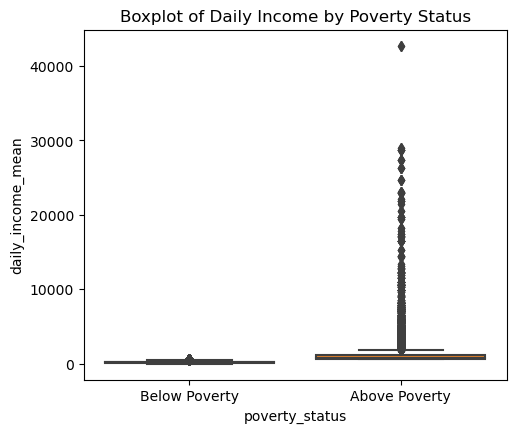

In [16]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='poverty_status', y='daily_income_mean', data=df1)
plt.title('Boxplot of Daily Income by Poverty Status')




Text(0.5, 1.0, 'Distribution of Daily Income by Poverty Status')

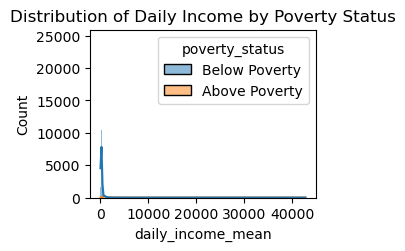

In [17]:
plt.subplot(2, 2, 2)
sns.histplot(data=df1, x='daily_income_mean', hue='poverty_status', kde=True, multiple="stack")
plt.title('Distribution of Daily Income by Poverty Status')


Text(0.5, 1.0, 'Count of Households in Each Poverty Status')

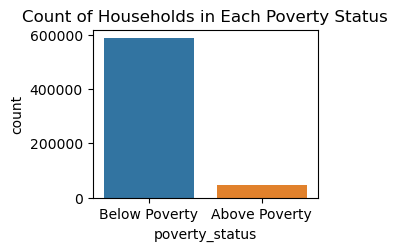

In [18]:
plt.subplot(2, 2, 3)
sns.countplot(x='poverty_status', data=df1)
plt.title('Count of Households in Each Poverty Status')



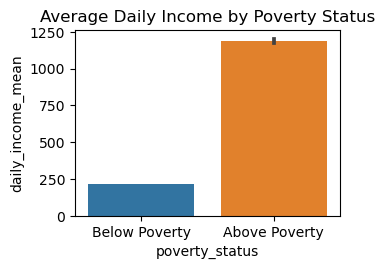

In [19]:
plt.subplot(2, 2, 4)
sns.barplot(x='poverty_status', y='daily_income_mean', data=df1, estimator='mean')
plt.title('Average Daily Income by Poverty Status')

plt.tight_layout()
plt.show()